In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [143]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,8

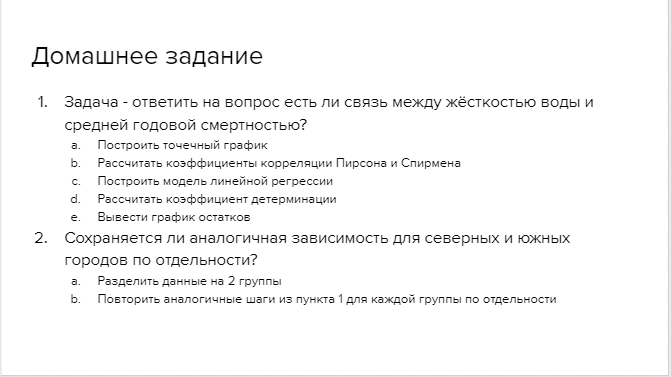

In [2]:
from IPython.display import Image
Image("hw_pic.png")

In [3]:
water = pd.read_csv('water.csv',index_col=0)
water.head()

,location,town,mortality,hardness
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18


Проверим Датафрейм

In [4]:
water.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1 to 61
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.4+ KB


In [7]:
print(f'Размер датафрейма {water.shape[0]} строк, {water.shape[1]} столбцов' )

Размер датафрейма 61 строк, 4 столбцов


In [9]:
print(' Уникальных значений для каждого столбца: \n'+'-'*50)
for i in water.columns:
    print(f'\t {i} = { len( set(water[i]) )  } ')

 Уникальных значений для каждого столбца: 
--------------------------------------------------
	 location = 2 
	 town = 61 
	 mortality = 58 
	 hardness = 42 


In [12]:
print(' Пустых значений \n'+'-'*50 + '\n', water.isnull().sum() )

 Пустых значений 
--------------------------------------------------
 location     0
town         0
mortality    0
hardness     0
dtype: int64


In [55]:
df = water.groupby('location')['town'].count()
print(f' Значений для location \n {"-"*50}')
for i in range(len(df.index)):
    print(f'\t {df.index[i]} = {df[i]}' )

 Значений для location 
 --------------------------------------------------
	 North = 35
	 South = 26


<AxesSubplot:title={'center':'Рис.1. Точечная диаграмма(scatterplot) по всем городам UK'}, xlabel='mortality', ylabel='hardness'>

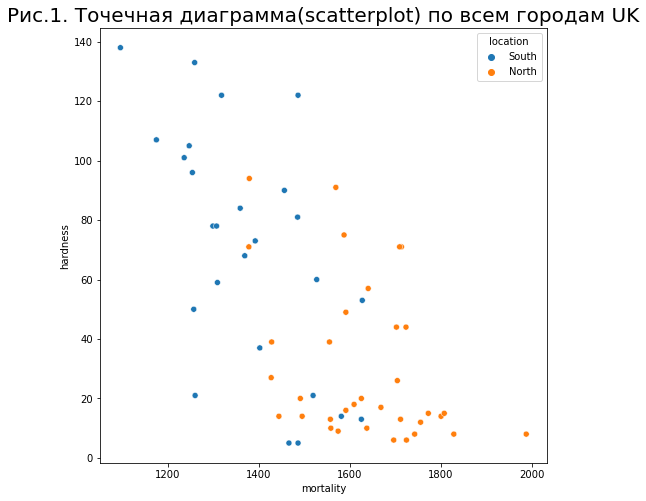

In [144]:
plt.title('Рис.1. Точечная диаграмма(scatterplot) по всем городам UK',
            fontsize = 20)
sns.scatterplot(x = water['mortality'], y = water['hardness'], hue = water['location'])

### По графику уже можно сделать вывод: 
- на севере более высокая смертность
- на севере менее жесткая вода

## Посчитаем коррелируют ли показатели из датафрейма:

In [81]:
print(' Коэффициент корреляции: \n' + '-'*50)
print('\t Пирсона = \n', water[['mortality', 'hardness']].corr() )
print( '\tCпирмана = \n', water[['mortality', 'hardness']].corr(method='spearman') )

 Коэффициент корреляции: 
--------------------------------------------------
	 Пирсона = 
            mortality  hardness
mortality   1.000000 -0.654849
hardness   -0.654849  1.000000
	Cпирмана = 
            mortality  hardness
mortality   1.000000 -0.631665
hardness   -0.631665  1.000000


Судя по коэффициентам, корреляция есть.  
## Построим график линейной регрессии:

In [247]:
X = water[['hardness']]
y = water['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [248]:
y_pred = model.predict(X_test)

model.score(X_test, y_test)

0.5046490611017092

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


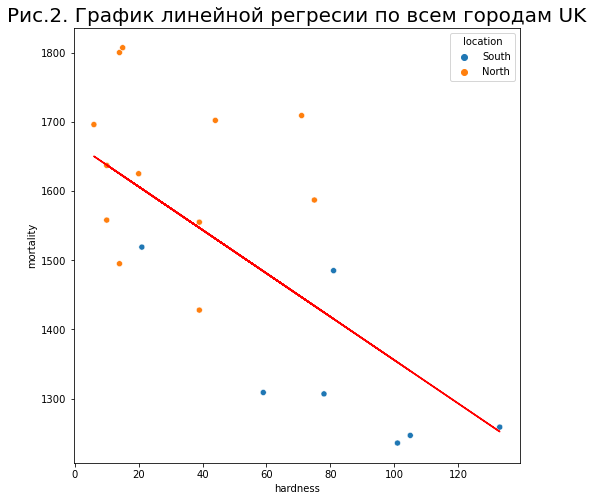

In [145]:
plt.title('Рис.2. График линейной регресии по всем городам UK',
             fontsize = 20)

sns.scatterplot(X_test['hardness'], y_test, hue = water['location'])
plt.plot(X_test, y_pred, c='r')

### График остатков лин регресии

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Рис.2.1. График остатков лин регресии'}, xlabel='hardness', ylabel='mortality'>

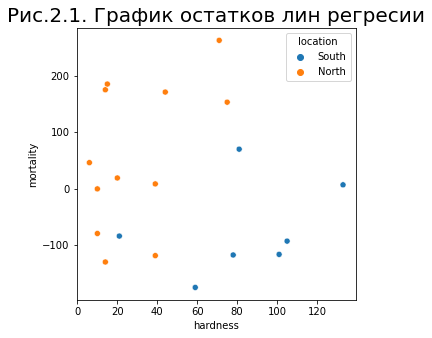

In [249]:
f, ax = plt.subplots(figsize=(5, 5))
plt.title('Рис.2.1. График остатков лин регресии', fontsize = 20) 
sns.scatterplot(X_test['hardness'], y_test - y_pred, hue = water['location'])

По рис.2.1. " График остатков лин регресии" видно:
- в остатках видна структура (скорее всего линейная модель регресии не является приемлемой для северных и южных городов)
- Северные города сгруппированы и структурированы слева ( в стороне низких значений)


## По рис.2.1 имеет смысл разделить на  северные и южные города.
## Построим график линейной регрессии, разделенный по северным и южным городам '51 штата'

In [224]:
set(water.location)

{'North', 'South'}

## Северные  города '51 штата' :

In [235]:
print(f" Количество точек (hardness, mortality) для North  = {water.loc[water.location.str.contains('North'),['hardness'] ].count()[0]}")

 Количество точек (hardness, mortality) для North  = 35


In [233]:
print(' Коэффициент корреляции: \n' + '-'*50)
print('\t Пирсона = \n', water.loc[water.location.str.contains('North'),['mortality', 'hardness'] ].corr() )
print( '\tCпирмана = \n', water.loc[water.location.str.contains('North'), ['mortality', 'hardness'] ].corr(method='spearman') )

 Коэффициент корреляции: 
--------------------------------------------------
	 Пирсона = 
            mortality  hardness
mortality   1.000000 -0.368598
hardness   -0.368598  1.000000
	Cпирмана = 
            mortality  hardness
mortality   1.000000 -0.404208
hardness   -0.404208  1.000000


Вывод: Очень низкий коэффициент корреляции.

In [238]:

X = water.loc[water.location.str.contains('North'),['hardness'] ]
y = water.loc[water.location.str.contains('North'),'mortality' ]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

model.score(X_test, y_test)

0.018885304285745863

Вывод: Очень низкий коэффициент корреляции - Плохо. Должен стремиться к 1.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


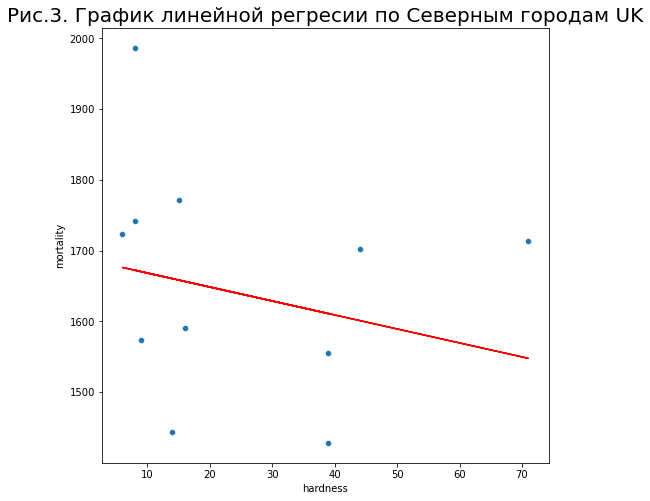

In [239]:
plt.title(f'Рис.3. График линейной регресии по Северным городам UK',fontsize = 20)

sns.scatterplot(X_test['hardness'], y_test)
plt.plot(X_test, y_pred, c='r')

### График остатков лин регресии

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Рис.3.1. График остатков лин регресии по Северным городам'}, xlabel='hardness', ylabel='mortality'>

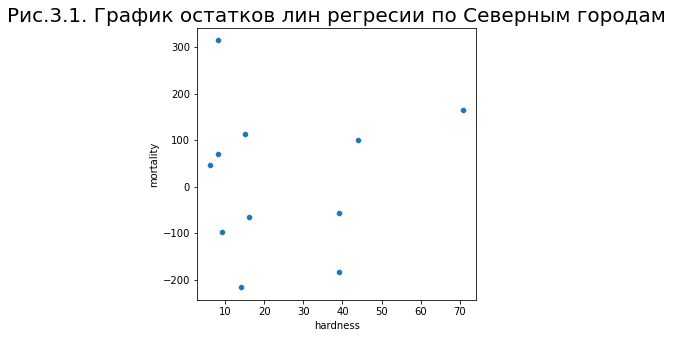

In [241]:
f, ax = plt.subplots(figsize=(5, 5))
plt.title('Рис.3.1. График остатков лин регресии по Северным городам', fontsize = 20) 
sns.scatterplot(X_test['hardness'], y_test - y_pred)

Вывод из Рис.3 'График линейной регресии по Северным городам UK' и рис.3.1 'График остатков лин регресии по Северным городам':
- коэф.корреляции и структурированность графика указывают что корреляция слабая но есть,
- линейная модель регресии не является приемлемой для северных городов UK

## Южные  города '51 штата' :

In [242]:
print(f" Количество точек (hardness, mortality) для South  = {water.loc[water.location.str.contains('South'),['hardness'] ].count()[0]}")

 Количество точек (hardness, mortality) для South  = 26


In [250]:
print(' Коэффициент корреляции: \n' + '-'*50)
print('\t Пирсона = \n', water.loc[water.location.str.contains('South'),['mortality', 'hardness'] ].corr() )
print( '\tCпирмана = \n', water.loc[water.location.str.contains('South'), ['mortality', 'hardness'] ].corr(method='spearman') )

 Коэффициент корреляции: 
--------------------------------------------------
	 Пирсона = 
            mortality  hardness
mortality   1.000000 -0.602153
hardness   -0.602153  1.000000
	Cпирмана = 
            mortality  hardness
mortality   1.000000 -0.595723
hardness   -0.595723  1.000000


Вывод: Очень высокий коэффициент корреляции.

In [253]:

X = water.loc[water.location.str.contains('South'),['hardness'] ]
y = water.loc[water.location.str.contains('South'),'mortality' ]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

model.score(X_test, y_test)

-2.5519223012352077

Вывод: Очень низкий коэффициент корреляции - Плохо. Должен стремиться к 1.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


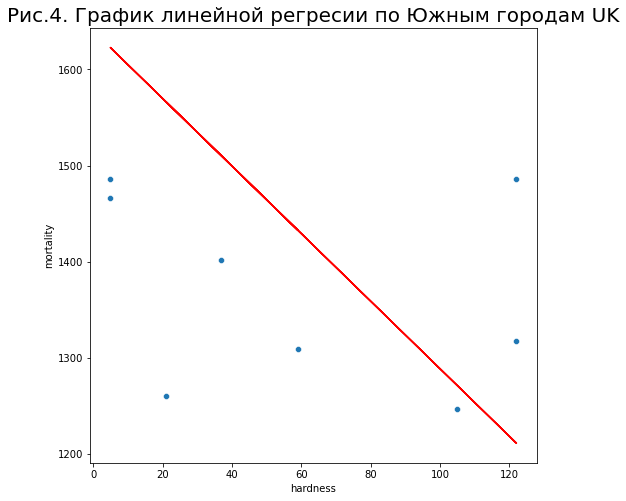

In [256]:
plt.title(f'Рис.4. График линейной регресии по Южным городам UK',fontsize = 20)

sns.scatterplot(X_test['hardness'], y_test)
plt.plot(X_test, y_pred, c='r')

### График остатков лин регресии

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Рис.4.1. График остатков лин регресии по Южным городам'}, xlabel='hardness', ylabel='mortality'>

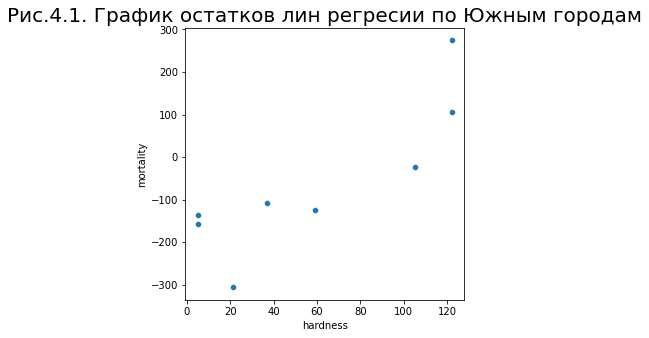

In [257]:
f, ax = plt.subplots(figsize=(5, 5))
plt.title('Рис.4.1. График остатков лин регресии по Южным городам', fontsize = 20) 
sns.scatterplot(X_test['hardness'], y_test - y_pred)

Вывод из Рис.4 'График линейной регресии по Южным городам UK' и рис.4.1 'График остатков лин регресии по Южным городам':
- коэф.корреляции и структурированность графика указывают что корреляция сильно выражена,
- график остатков структурирован
- линейная модель регресии не является приемлемой для северных городов UK

## Можно использовать функцию jointplot из библиотеки seaborn

### Общй график:

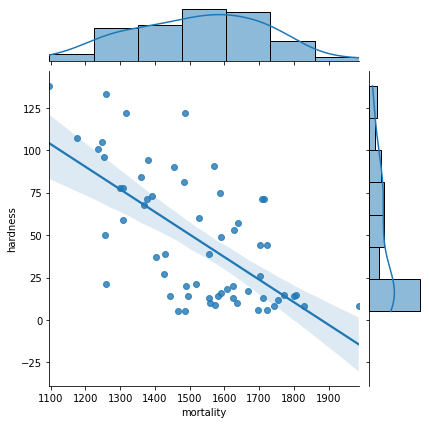

In [9]:
sns.jointplot(x = 'mortality', y = 'hardness' , data = water, kind = 'reg')

### График остатков:

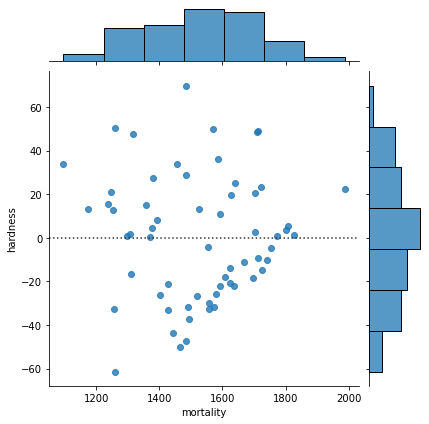

In [148]:
sns.jointplot(x = 'mortality', y = 'hardness' , data = water, kind = 'resid')

### График Северных городов UK:

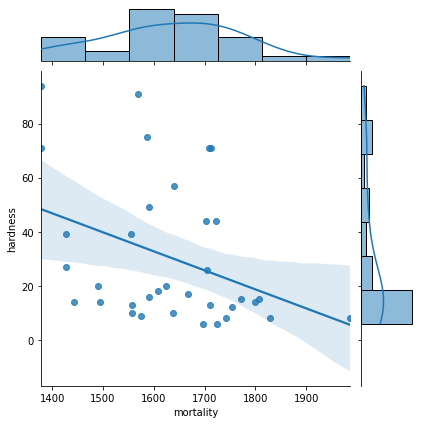

In [261]:
sns.jointplot(x = 'mortality', y = 'hardness' , data = water.loc[water.location.str.contains('North'),:], kind = 'reg')

### График остатков:

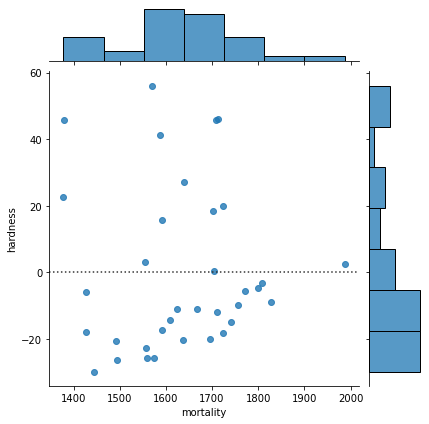

In [262]:
sns.jointplot(x = 'mortality', y = 'hardness' , data = water.loc[water.location.str.contains('North'),:], kind = 'resid')

### График Южных городов UK:

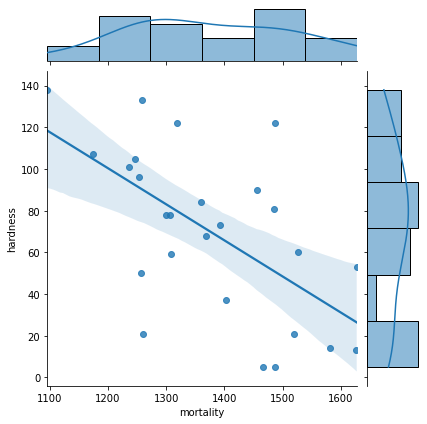

In [263]:
sns.jointplot(x = 'mortality', y = 'hardness' , data = water.loc[water.location.str.contains('South'),:], kind = 'reg')

### График остатков:

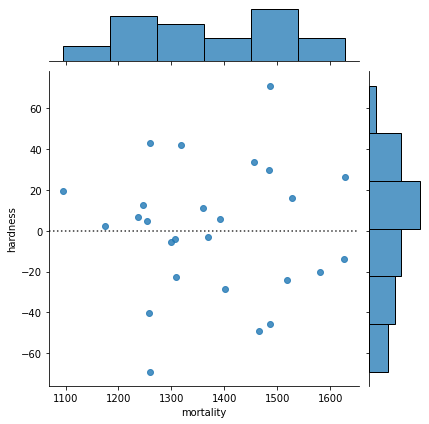

In [264]:
sns.jointplot(x = 'mortality', y = 'hardness' , data = water.loc[water.location.str.contains('South'),:], kind = 'resid')